In [1]:
%pylab inline
from simulation import *
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os



Populating the interactive namespace from numpy and matplotlib


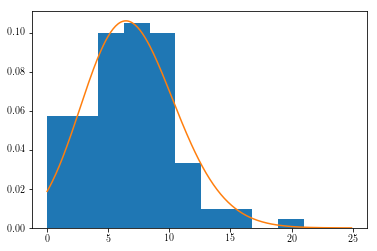

In [2]:
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]

n_ft = [len(l) for l in Lebron_FT]
shape1, loc1, scale1 = gamma.fit(n_ft)
x = np.arange(0,25,.1)

g1 = gamma.pdf(x=x, a=shape1, loc=loc1, scale=scale1)

plt.hist(n_ft, normed=True, bins=10)
plt.plot(x,g1)

In [3]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)

In [6]:
bron_1

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 0.65783133,  0.34216867]),
              '-': array([ 0.73298429,  0.26701571]),
              '0': array([ 0.65591398,  0.34408602])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 272.,  141.]),
              '-': array([ 139.,   50.]),
              '0': array([ 60.,  31.])}))

In [9]:
gamma.rvs(shape=shape1,loc=loc1,scale=scale1)

TypeError: _parse_args_rvs() got an unexpected keyword argument 'shape'

In [8]:
gamma.pdf?

In [10]:
?gamma.fit

In [11]:
shape1

60.284869003656766

In [12]:
loc1

-22.479084016306729

In [13]:
scale1

0.48783524520007737